In [ ]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Data
df = pd.read_csv(df = pd.read_csv("C:/Users/JK_al/OneDrive/Escritorio/CODING/Python/Curso_Luke/Base_de_datos/job_postings_flat.csv"))

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df = df[df['job_posted_date'].dt.year == 2024]

In [6]:
df_US_DE = df[(df['job_title_short']=='Data Engineer') & (df['job_country']=='United States')].copy()
df_US_DE['job_posted_month'] = df_US_DE['job_posted_date'].dt.month
df_US_DE_exp = df_US_DE.explode('job_skills')

In [7]:
df_US_DE_pivot = df_US_DE_exp.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_US_DE_pivot.loc['Total'] = df_US_DE_pivot.sum()
df_US_DE_pivot = df_US_DE_pivot[df_US_DE_pivot.loc['Total'].sort_values(ascending=False).index]
df_US_DE_pivot = df_US_DE_pivot.drop('Total')
df_US_DE_pivot

job_skills,sql,python,aws,azure,spark,snowflake,java,databricks,scala,kafka,...,unreal,lua,mattermost,ringcentral,delphi,workfront,wrike,dplyr,clickup,haskell
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,2069,1901,1173,931,903,661,664,501,470,441,...,0,0,1,0,0,0,1,0,0,0
2,2028,1906,1241,926,1014,746,669,557,538,477,...,0,0,0,0,0,0,0,0,0,0
3,2013,1891,1160,972,856,720,633,541,500,440,...,0,1,0,1,0,0,0,0,0,0
4,1875,1826,1151,930,897,683,576,528,484,457,...,0,0,0,0,0,0,0,1,0,0
5,1907,1758,1202,949,815,636,595,529,460,408,...,0,0,0,0,0,0,0,0,0,1
6,1866,1782,1105,953,818,665,593,565,483,453,...,1,0,0,0,0,1,0,0,0,0
7,2185,2108,1372,1238,972,821,697,628,564,616,...,0,0,0,0,0,0,0,0,0,0
8,1905,2080,1408,1374,979,635,558,629,516,602,...,0,0,0,0,0,0,0,0,0,0
9,1568,1643,1096,1039,781,523,487,515,443,471,...,0,0,0,0,1,0,0,0,0,0


In [8]:
DE_totals = df_US_DE.groupby('job_posted_month').size()

In [9]:
df_US_DE_perc = df_US_DE_pivot.div(DE_totals/100, axis=0)  #Con esta funcion buscamos el porcentaje para todos los meses
df_US_DE_perc

job_skills,sql,python,aws,azure,spark,snowflake,java,databricks,scala,kafka,...,unreal,lua,mattermost,ringcentral,delphi,workfront,wrike,dplyr,clickup,haskell
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,69.174189,63.557339,39.217653,31.126713,30.190572,22.099632,22.199933,16.750251,15.713808,14.744233,...,0.000000,0.000000,0.033434,0.000000,0.000000,0.000000,0.033434,0.000000,0.000000,0.000000
2,64.875240,60.972489,39.699296,29.622521,32.437620,23.864363,21.401152,17.818298,17.210493,15.259117,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,68.867602,64.693808,39.685255,33.253507,29.284981,24.632227,21.655833,18.508382,17.105713,15.053028,...,0.000000,0.034211,0.000000,0.034211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,65.858799,64.137689,40.428521,32.665964,31.506849,23.990165,20.231823,18.545838,17.000351,16.051985,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035125,0.000000,0.000000
5,68.597122,63.237410,43.237410,34.136691,29.316547,22.877698,21.402878,19.028777,16.546763,14.676259,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035971
6,69.574944,66.442953,41.200597,35.533184,30.499627,24.794929,22.110365,21.066368,18.008949,16.890380,...,0.037286,0.000000,0.000000,0.000000,0.000000,0.037286,0.000000,0.000000,0.000000,0.000000
7,66.676839,64.327128,41.867562,37.778456,29.661276,25.053403,21.269454,19.163869,17.210864,18.797681,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,58.796296,64.197531,43.456790,42.407407,30.216049,19.598765,17.222222,19.413580,15.925926,18.580247,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,61.345853,64.280125,42.879499,40.649452,30.555556,20.461659,19.053208,20.148670,17.331768,18.427230,...,0.000000,0.000000,0.000000,0.000000,0.039124,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
# Cambiar los indices de meses en numero a meses con nnombre
df_US_DE_perc = df_US_DE_perc.reset_index()
df_US_DE_perc['job_posted_month_l'] = df_US_DE_perc['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_US_DE_perc = df_US_DE_perc.set_index('job_posted_month_l')
df_US_DE_perc = df_US_DE_perc.drop(columns='job_posted_month')
df_US_DE_perc

job_skills,sql,python,aws,azure,spark,snowflake,java,databricks,scala,kafka,...,unreal,lua,mattermost,ringcentral,delphi,workfront,wrike,dplyr,clickup,haskell
job_posted_month_l,,,,,,,,,,,,,,,,,,,,,
Jan,69.174189,63.557339,39.217653,31.126713,30.190572,22.099632,22.199933,16.750251,15.713808,14.744233,...,0.000000,0.000000,0.033434,0.000000,0.000000,0.000000,0.033434,0.000000,0.000000,0.000000
Feb,64.875240,60.972489,39.699296,29.622521,32.437620,23.864363,21.401152,17.818298,17.210493,15.259117,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,68.867602,64.693808,39.685255,33.253507,29.284981,24.632227,21.655833,18.508382,17.105713,15.053028,...,0.000000,0.034211,0.000000,0.034211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,65.858799,64.137689,40.428521,32.665964,31.506849,23.990165,20.231823,18.545838,17.000351,16.051985,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035125,0.000000,0.000000
May,68.597122,63.237410,43.237410,34.136691,29.316547,22.877698,21.402878,19.028777,16.546763,14.676259,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035971
Jun,69.574944,66.442953,41.200597,35.533184,30.499627,24.794929,22.110365,21.066368,18.008949,16.890380,...,0.037286,0.000000,0.000000,0.000000,0.000000,0.037286,0.000000,0.000000,0.000000,0.000000
Jul,66.676839,64.327128,41.867562,37.778456,29.661276,25.053403,21.269454,19.163869,17.210864,18.797681,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,58.796296,64.197531,43.456790,42.407407,30.216049,19.598765,17.222222,19.413580,15.925926,18.580247,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,61.345853,64.280125,42.879499,40.649452,30.555556,20.461659,19.053208,20.148670,17.331768,18.427230,...,0.000000,0.000000,0.000000,0.000000,0.039124,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df_plot = df_US_DE_perc.iloc[:, :5]   #Seleccionar 5 columnas con todas las filas
df_plot

job_skills,sql,python,aws,azure,spark
job_posted_month_l,,,,,
Jan,69.174189,63.557339,39.217653,31.126713,30.190572
Feb,64.875240,60.972489,39.699296,29.622521,32.437620
Mar,68.867602,64.693808,39.685255,33.253507,29.284981
Apr,65.858799,64.137689,40.428521,32.665964,31.506849
May,68.597122,63.237410,43.237410,34.136691,29.316547
Jun,69.574944,66.442953,41.200597,35.533184,30.499627
Jul,66.676839,64.327128,41.867562,37.778456,29.661276
Aug,58.796296,64.197531,43.456790,42.407407,30.216049
Sep,61.345853,64.280125,42.879499,40.649452,30.555556


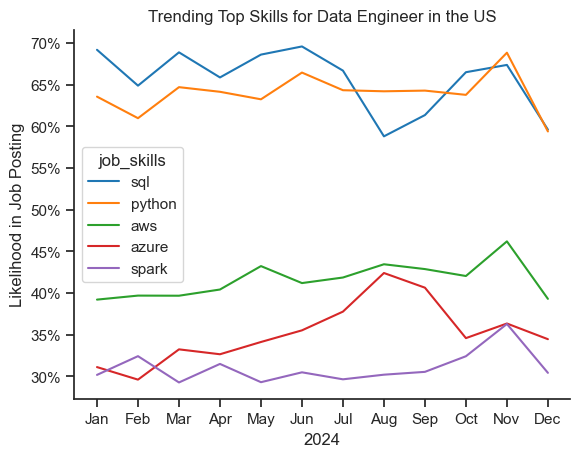

In [26]:
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')

plt.title('Trending Top Skills for Data Engineer in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2024')
sns.despine()

# Formato para establecer porcentaje a los ejes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Colocar el titulo al final de cada linea (En este caso no es viable por la confusion de SQL y Python)
#for i in range(5):
#    plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()